**Exercise 1(a)**
The following code is the implementation of the Gram-Schmidt method.

In [1]:
function Q = gram_schmidt(X)
% Q = gram_schmidt(X)
% X is input matrix
% Q is output matrix with orthonomal set of vectors spanning the same set as X aka the basis 
% this function implements the gram_schmidt method to produce a set of linearly independent and orthogonal vectors of X
% 2/9/2026

    [m, n] = size(X); 
    Q = zeros(m,0); %empty Q  
    %counter for orthonormal vectors
    nq = 0; 

    %--- main loop over cols of X---%
    for j = 1:n
        v = X(:,j);     %go to next col

        %loop over every vector in Q
        for i = 1:nq
            r_ij = Q(:,i)' * v;     %compute the projection of x_j on q_i

            v = v - r_ij *Q(:, i);  %subtract it from x_j to orthogonize v
        end

        r_jj = norm(v);     %compute norm of v

        if r_jj > 1e-16     %if norm is greater than roundoff error
            nq = nq + 1;    %add 1 to counter
            Q(:, nq) = v/r_jj;  %divide by its norm and add to final matrix Q
        end
    end
end


% --- 1(b) ---%
X_b = [1 1 1; 
       0 1 1; 
       0 0 1];
Q_b = gram_schmidt(X_b);

fprintf('Exercise 1(b)\n');
disp(Q_b);

% --- 1(c) ---%
X_c = [1 1 1;
       1 1 0;
       1 0 0];
Q_c = gram_schmidt(X_c);

fprintf('Exercise 1(c)\n');
disp(Q_c);

X_d = [2 -1 0;
       0 -1 2;
      -1 0 0;
      -1 2 -1];
Q_d = gram_schmidt(X_d);

fprintf('Exercise 1(d)\n');
disp(Q_d);
%--- check the norms of Q_c & Q_d ---%
norms = zeros(1, size(Q_c, 2));     % row=1 and col size the colsizeof Q_c 
for k = 1:size(Q_c,2)
    norms(k) = norm(Q_c(:,k));
end

fprintf('norms of Q_c cols:\n', norms);
disp(norms);

%--- check the orthogonality of the vectors---
fprintf('Dot products for Q_c:\n');
for i = 1:size(Q_c,2)
    for j = i+1:size(Q_c,2)
        dp = Q_c(:,i)' * Q_c(:,j);
        fprintf('Dot product of col %d and %d = %e\n', i, j, dp);
    end
end

fprintf('norms of Q_d columns:\n');
for k = 1:size(Q_d,2)
    fprintf('Norm of column %d in Q_d = %f\n', k, norm(Q_d(:,k)));
end

fprintf('Dot products for Q_d:\n');
for i = 1:size(Q_d,2)
    for j = i+1:size(Q_d,2)
        dp = Q_d(:,i)' * Q_d(:,j);
        fprintf('Dot product of col %d and %d = %e\n', i, j, dp);
    end
end

fprintf('Q_d'' * Q_d = \n');
disp(Q_d' * Q_d);

fprintf('Q_d * Q_d'' = \n');
disp(Q_d * Q_d');


Exercise 1(b)
     1     0     0
     0     1     0
     0     0     1

Exercise 1(c)
    0.5774    0.4082    0.7071
    0.5774    0.4082   -0.7071
    0.5774   -0.8165         0

Exercise 1(d)
    0.8165    0.1826    0.0000
         0   -0.5477    0.8165
   -0.4082   -0.3651   -0.4082
   -0.4082    0.7303    0.4082

norms of Q_c cols:
    1.0000    1.0000    1.0000

Dot products for Q_c:
Dot product of col 1 and 2 = -3.885781e-16
Dot product of col 1 and 3 = -5.551115e-17
Dot product of col 2 and 3 = -5.551115e-17
norms of Q_d columns:
Norm of column 1 in Q_d = 1.000000
Norm of column 2 in Q_d = 1.000000
Norm of column 3 in Q_d = 1.000000
Dot products for Q_d:
Dot product of col 1 and 2 = 3.330669e-16
Dot product of col 1 and 3 = 3.608225e-16
Dot product of col 2 and 3 = 0.000000e+00
Q_d' * Q_d = 
    1.0000    0.0000    0.0000
    0.0000    1.0000         0
    0.0000         0    1.0000

Q_d * Q_d' = 
    0.7000   -0.1000   -0.4000   -0.2000
   -0.1000    0.9667   -0.1333   -0.0667


**Exercise 1(b)**
Test the program with the matrix X = [ 1 1 1; 0 1 1 ; 0 0 1 ]. 
The matrix we tested is an upper triangular matrix, which means the vectors are already linearly independent. 
The first vector $v_1 = [1, 0, 0]^T$ doesnt change at all since it is already an orthogonal unit vector i of xyz, so it is added as is to Q_b.
The second vector $v_2 = [1, 1, 0]^T$ is projected onto q_1 and subtract $[1, 1, 0]^T - [1, 0, 0]^T = [0, 1, 0]^T$. It is then added to Q_b.
The third vector $v_3 = [1, 1, 1]^T$ is projected on both q_1 and q_2 and subtract $[1, 1, 1]^T - [1, 0, 0]^T - [0, 1, 0]^T = [0, 0, 1]^T$. It is then added to Q_b.

(Before they are added to the list of vectors of Q_b, their norm will already be equal to 1, therefore nothing changes) 

So we are left with the standard basis for xyz space, which is represented by a 3x3 Identity Matrix. 

**Exercise 1(c)/(d)**
We confirmed from the code that each column vector will have a norm equal to 1. 
The way to check if they are pairwise orthogonal is to check if their dot product is equal to 0. We see that for the matrix in 1(c), this is true. 
However, for 1(d) even though the dot product between the columns is 0, we verified that $Q_d'*Q_d \neq Q_d*Q_d'$. Therefore, the product of the Gram-Schmidt method is not orthogonal, which is not surprising since, by definition, an orthogonal matrix is a square matrix and in our case we have a 4x3 matrix. 

**Exercise 2(a)**
The following code is the implementation of the QR factorization by Gram-Schmidt.
There are two main differences in the methods
1.We save the R(i,j) = Q(:,i)' * v (the projection coefficients) which will be the elements of the upper triangular, and 
2.We also save the dependent columns (so no counter to discard them) 
We make these changes because we need all columns in Q and n columns in R in order for both Q and R to be conformable matrices to produce the original matrix A. 

In [2]:
function [Q R] = gs_factor(A)
% Q = gram_schmidt(X)
% A is input mxn matrix
% Q is output matrix mxn with orthonomal set of vectors (cols) 
% R is output matrix nxn upper triangular
% computes the QR factorization of the matrix A
% Kat Tzioumakis
% 2/9/2026


[m,n] = size(A);

%initialize with 0
Q = zeros(m,n);
R = zeros(n,n);

% --- main loop over columns of A --- %
    for j = 1:n
        
        v = A(:,j);     % go to next col
        
        % subtract projections onto previous col
        for i = 1:j-1
            R(i,j) = Q(:,i)' * v;      % projection coefficient
            v = v - R(i,j) * Q(:,i);   % subtract projection
        end

        R(j,j) = norm(v);   % norm of remaining vector
        
        if R(j,j) > 1e-16
            Q(:,j) = v / R(j,j);   % normalize
        else
            Q(:,j) = zeros(m,1);   % dependent column
        end
        
    end
end


% --- Exercise 2(b)---%
A = [1 1 1;
     1 1 0;
     1 0 0];

[Q,R] = gs_factor(A);

disp(Q)
disp(R)

% --- Exercise 2(c) check with norms---%
B = rand(100,100);

[Q_c,R_c] = gs_factor(B);

error_measure = norm(Q_c'*Q_c-eye(100));
fprintf('norm of 100x100 matrix: %e\n', error_measure);
%disp(norm);

error_measure2 = norm(Q_c*Q_c'-eye(100));
fprintf('norm of 100x100 matrix: %e\n', error_measure2);

check_trig = norm(tril(R_c,-1));
fprintf('norm of Upper Triangular matrix: %e\n', check_trig);

check_factor = norm(B - Q_c*R_c);
fprintf('norm of B-Q*R: %16e\n', check_trig);



    0.5774    0.4082    0.7071
    0.5774    0.4082   -0.7071
    0.5774   -0.8165         0

    1.7321    1.1547    0.5774
         0    0.8165    0.4082
         0         0    0.7071

norm of 100x100 matrix: 2.287708e-14
norm of 100x100 matrix: 2.260657e-14
norm of Upper Triangular matrix: 0.000000e+00
norm of B-Q*R:     0.000000e+00


**Exercise 2(b)**
We see that by running the code that we get the same matrix as the one in the previous exercise. This just verifies that our code is running properly and computes the QR factorization of a matrix. 

**Exercise 2(c)**
We have established that in order for a matrix to be orthogonal by definition it means that $$Q_d'*Q_d = Q_d*Q_d' = I$$
In order to check these products, we were given a hint to use this command: norm(Q’*Q-eye(100)).
This computes the product of $Q'*Q$ which, which should be equal to the identity matrix. The command eye(100) generates an Identity matrix with dimensions 100x100. Therefore by subtracting the identity matrix we essentially check if the matrix Q is orthogonal. 
Here by computing both products to check for orthogonality, the norm of the matrix is equal to an number that is very close to the round-off error on both computations, thus resulting in an almost perfectly orthogonal matrix Q. 
The matrix R is upper triangluar, since its norm here is equal to 0. 
Again, since the norm is equal to 0 for $B-Q_c*R_c$, this means that $B=Q_c*R_c$. 

**Exercise 3** 
Householder method generates orthanormal vectors by reflecting the vector about an appropriate axis, thereby removing the need to subtract off projections.
The following code is the implementation of the Householder method.

In [3]:
function [Q R] = hh_factor(A)
% A is input mxn matrix
% Q is output orthogonal matrix mxm  
% R is output matrix mxn upper triangular
% QR factorization with householder method 
% Kat Tzioumakis
%2/13/2026

[m,n] = size(A);

%we're building R on A
R=A;
Q = eye(m); 


for k = 1:min(m,n)

    x = R(k:m, k);      %assigns elements to x from the k-th to the m-th row from the k-th col --> 1column

    %householder vector
    u = zeros(length(x), 1);
    u(1)=1;     % unit vector

    target_el = -sign(x(1)) * norm(x);      %1st new entry after reflect = -sign(x1)*||x||
    v = x - target_el*u;                    %vector i want to create
    v = v/norm(v);                          %normalize it

    %--- reflection applied on Q ---%
    Q(:,k:m) = Q(:, k:m) - 2*(Q(:, k:m)*v)*v';

    %--- refelction applied on R ---%
    R(k:m, k:n) = R(k:m, k:n) - 2*v*(v'*R(k:m, k:n));  %rows above k already visited, cols before k are triangular
end
end


%---exercise 3(b)---%
A = [1 1 1;
     1 1 0;
     1 0 0];

[Q,R] = hh_factor(A);
disp(Q)
disp(R)

    
%---exercise 3(c) ---%
C = rand(100,100);

[Q_c, R_c] = hh_factor(C);

error_measure = norm(Q_c'*Q_c-eye(100));
fprintf('norm of 100x100 matrix: %e\n', error_measure);
%disp(norm);

error_measure2 = norm(Q_c*Q_c'-eye(100));
fprintf('norm of 100x100 matrix: %e\n', error_measure2);

check_trig = norm(tril(R_c,-1));
fprintf('norm of Upper Triangular matrix: %e\n', check_trig);

check_factor = norm(C - Q_c*R_c);
fprintf('norm of B-Q*R: %16e\n', check_trig);



   -0.5774   -0.4082    0.7071
   -0.5774   -0.4082   -0.7071
   -0.5774    0.8165   -0.0000

   -1.7321   -1.1547   -0.5774
         0   -0.8165   -0.4082
         0   -0.0000    0.7071

norm of 100x100 matrix: 3.075376e-15
norm of 100x100 matrix: 3.083496e-15
norm of Upper Triangular matrix: 1.348427e-15
norm of B-Q*R:     1.348427e-15


**Exercise 3(b/c)
For the Q R facorization using the Householder reflections, we get a slightly different result for Q matrix produced compared to Gram-Schmidt. We see that the signs are flipped, which probably stems from the usage of the function sign used in the Householder method. The Q matrix produced is still orthogonal and we verified that by calculating the norm which is close to 0, the R matrix is also an Upper Triangular matrix since its entries below the main diagonal are 0. Lastly the factorization is also implemented correctly since its norm is also close to 0. 
I am not sure if there is a problem with the signs flipping. Technically its the same matrix with its vectors just pointing to the opposite direction, but I think this creates an issue when I want to know my coordinates and directions exactly for some application?

**Exercise 4**
Solve systems of linear equations using the QR factorization. 

In [4]:
clear;
function x = qr_solve(Q,R,b)

y = Q'*b;

n = length(y);
x = zeros(n,1);

%scan bottom to top bc we have an upper triangular
for i = n:-1:1
     x(i) = (y(i) - R(i,i+1:n)*x(i+1:n)) / R(i,i);
end
end

n =7; 
A = magic(n);
x = (1:n)'; %our real x values

b = A * x;

[Q,R] = qr(A);

x2 = qr_solve(Q,R,b);
norm_check = norm(x-x2);
disp(norm_check)

   7.7565e-15



**Exercise 5**
Write out an expression for the solution of $Ax=b$, assuming the SVD of A is $A=USV^+$. 
$Ax = b$
assuming that A is $A=USV^+$, we can rewrite the expression as:
$$USV^+x = b$$ $$U^+USV^+x = U^+b$$ Now using the fact that U is unitary $U^+U = I$ we can rewrite the expression as: $$SV^+x = U^+b$$ 
Using the diagonal matrix defined in the notes, since $S^+$ has the same shape as $S^T$, the product $S^+S = I$, we can multiply both sides with $S^+$ : 
$$V^+x = S^+U^+b$$ now we multiply both sides with V which is also unitary: $$x = VS^+U^+b$$

So that is the expression of the solution to Ax=b using the Singular Value Decomposition.

**Exercise 6**
Plotting an image using the Singular Value Decomposition

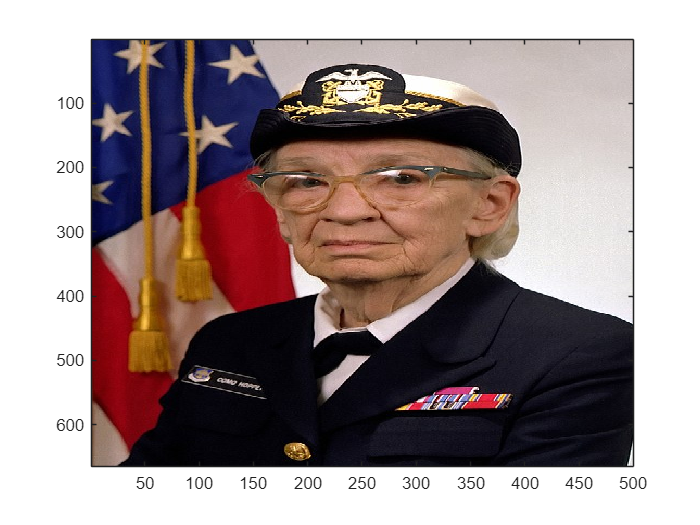

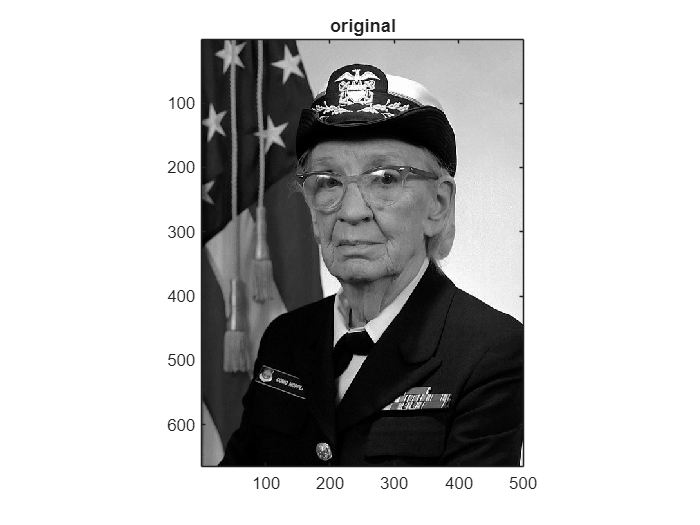

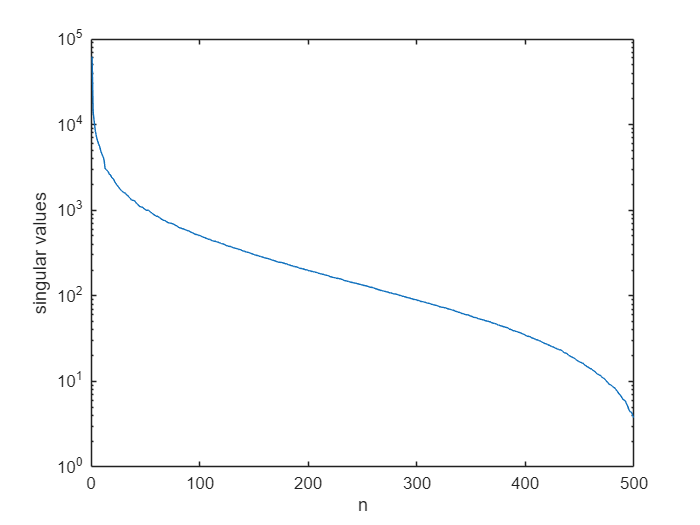

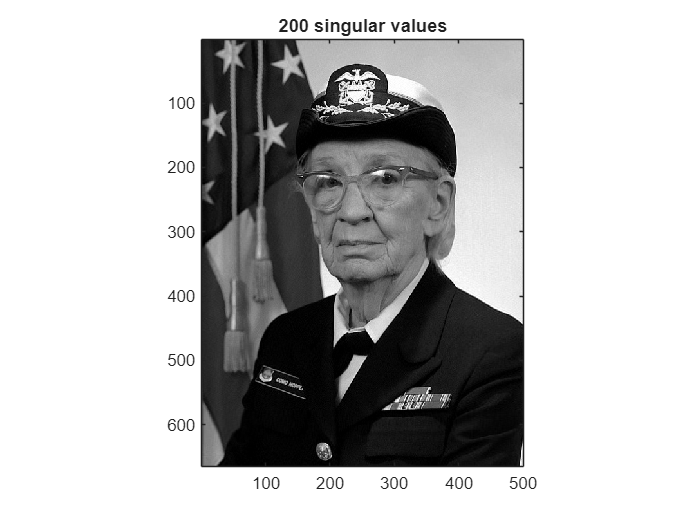

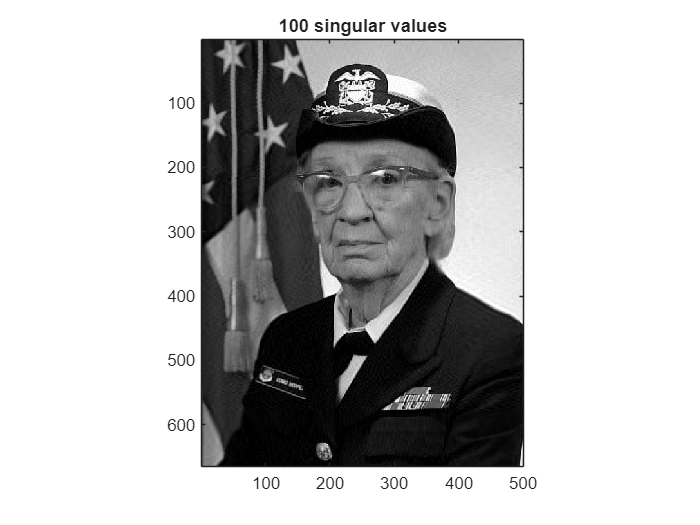

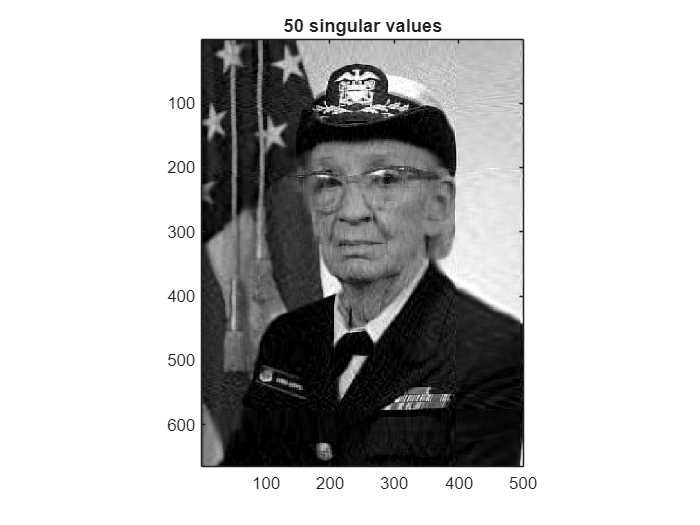

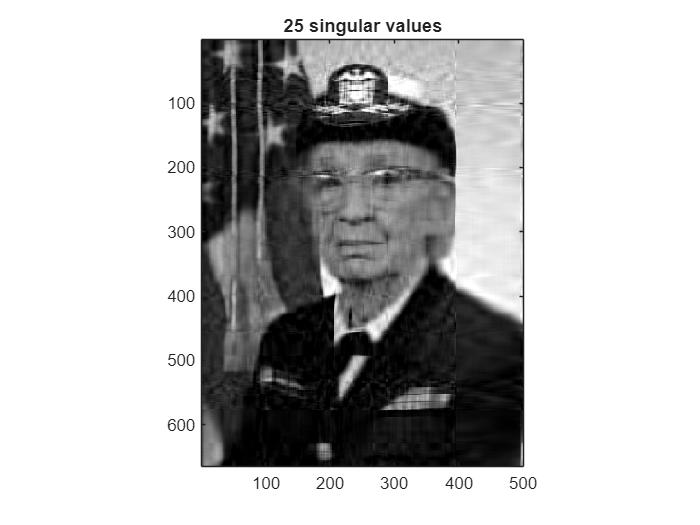

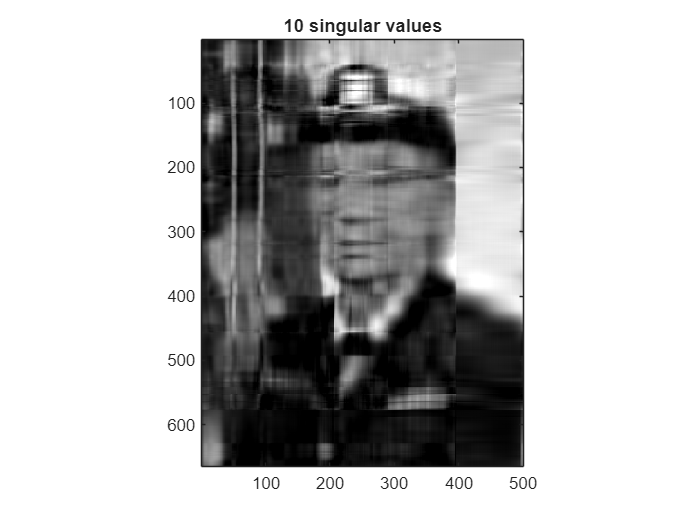

In [5]:
%% Exercise 6
rgbGH = imread('GraceHopper.jpg');
figure();
image(rgbGH);       %plot color image

bwGH = rgb2gray(rgbGH);     %convert to grey scale
imGH = double(bwGH);        %convert from unsigned integers to double for calculations

%plot grayscale image
figure()
colormap(gray(256)); 
image(imGH);
daspect([1 1 1]);       %this preserves aspect ratio
title('original');

%compute singular value decomposition
[U S V] = svd(imGH);

%plot singular values on semilog scale 
%notice how quickly the magnitude drops, 
% S contains the singular values which are the eigenvalues of hermitian matrix A^+*A
figure;
semilogy(diag(S))
ylabel('singular values')
xlabel('n')     %position of singular values in the S matrix


%pick number of singular values to use for reconstructing image
Nsvals = [200, 100, 50, 25, 10];

%plot compressed images by only including the largest ns singular values
for jj = 1:length(Nsvals)
    ns = Nsvals(jj);

    imNs = U(:,1:ns)*S(1:ns, 1:ns)*V(:,1:ns)';

    figure();
    colormap(gray(256));
    image(imNs);
    daspect([1 1 1]);
    title([num2str(ns)  ' singular values']);
end




**Exercise 6/Interpretation**
By running the semilogy(diag(S)) we see that the singular values follow an exponential decay as n increases. The first few hundred singular values have significantly larger magnitude values, hinting that this is probably where most of the information of the image is stored. The magnitude drops from $10^5$ to $10^3$ within the first 50-100 values. After roughly n=100, the decay is much slower, so these must represent more details in the images that we might be able to omit wihtout alternating the final image much.

When we test out different numbers of singular values, we see that at ns = 10, the image is blurred and a lot of detail is lost, since we haven't kept enough singular values to represent this image. We start seeing a significant change in the details of the image when we reduce the singular values to 50, where the image starts looking less clear. This hints at the fact that we can use the number of singular values as a threshold to store an image by containing most of its original information. 

**Exercise 7**
For this exercise we have to pick an image and run the same code to see how it changes. We have to estimate the compression, i.e. the amount of space savings for storing a suitable truncated SVD representation vs storing the full image. 

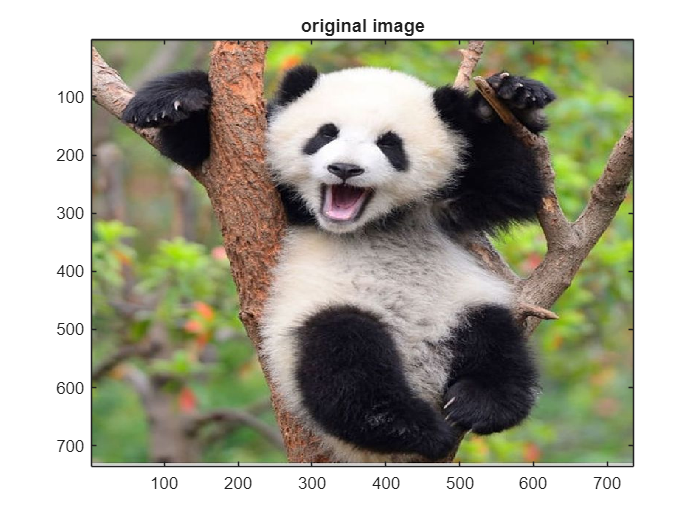

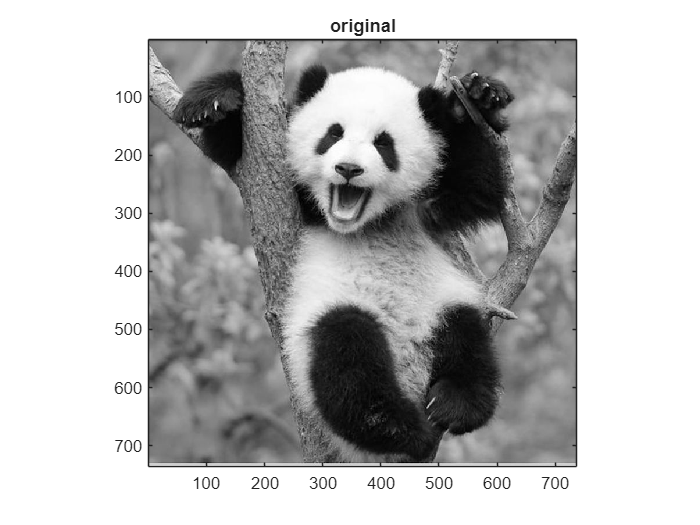

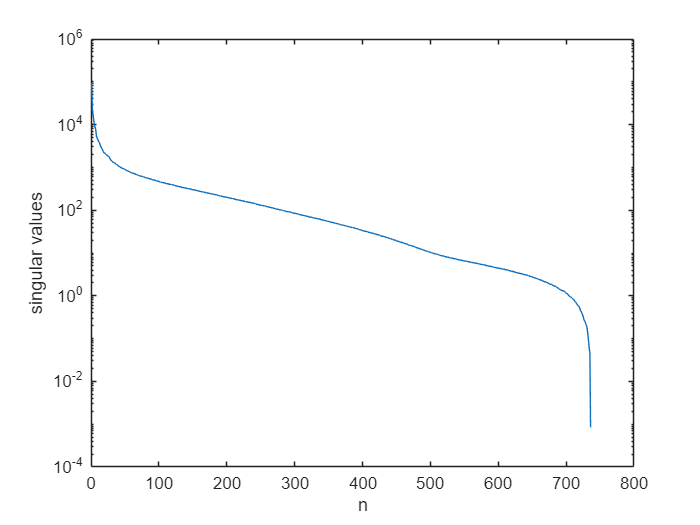

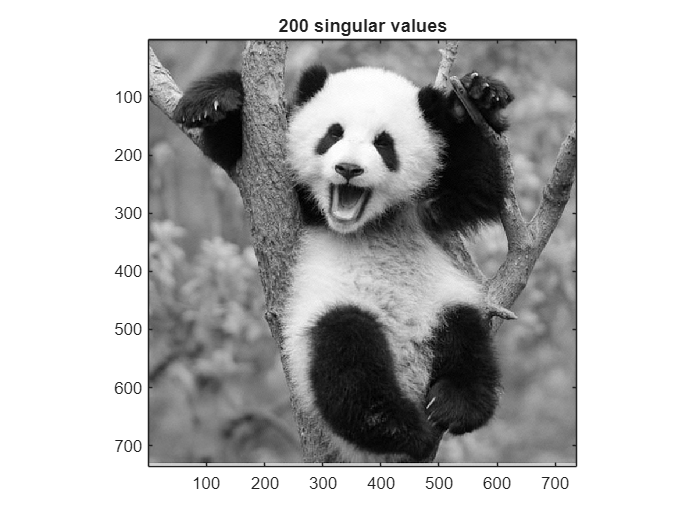

Results for ns = 200 singular values:
   Compression Ratio: 0.54 to 1
Space Savings: 45.62%


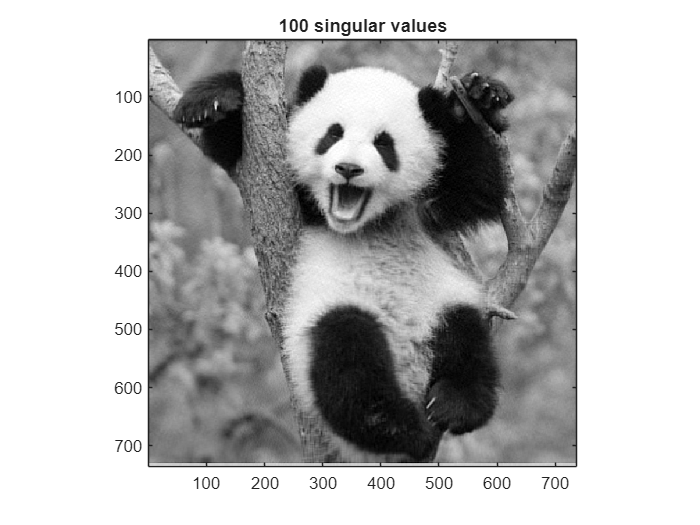

Results for ns = 100 singular values:
   Compression Ratio: 0.27 to 1
Space Savings: 72.81%


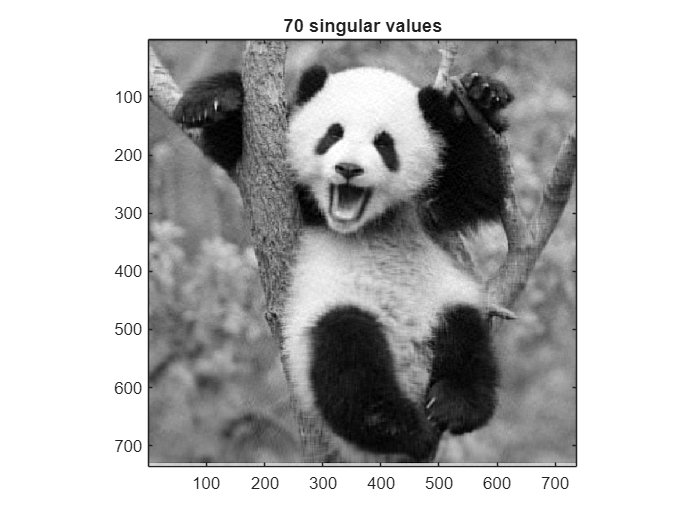

Results for ns = 70 singular values:
   Compression Ratio: 0.19 to 1
Space Savings: 80.97%


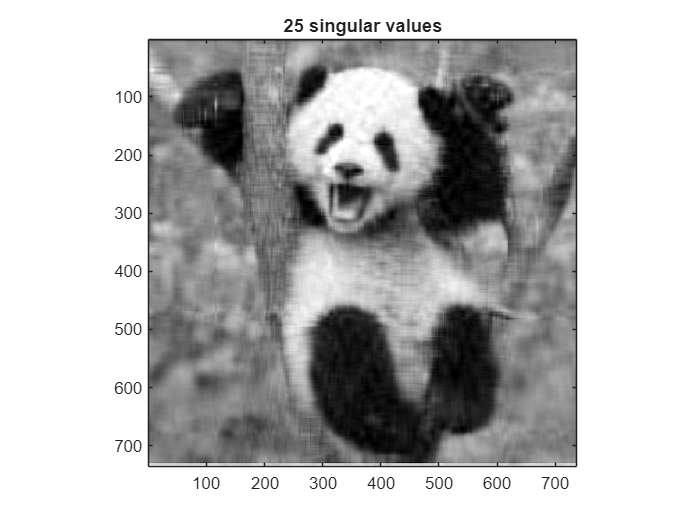

Results for ns = 25 singular values:
   Compression Ratio: 0.07 to 1
Space Savings: 93.20%


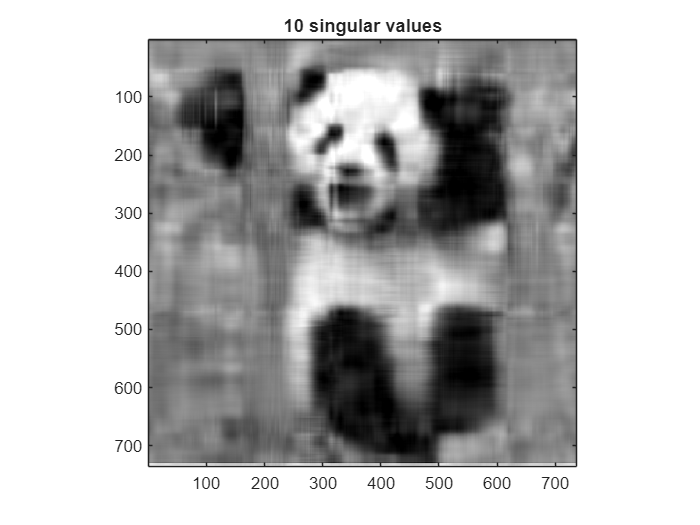

Results for ns = 10 singular values:
   Compression Ratio: 0.03 to 1
Space Savings: 97.28%


In [6]:
%% exercise 7
clear;
rgbPanda = imread('panda.jpg');
figure()
image(rgbPanda);
title('original image');


bwGH = rgb2gray(rgbPanda);     %convert to grey scale
imGH = double(bwGH);        %convert from unsigned integers to double for calculations
[m,n] = size(imGH);

%plot grayscale image
figure()
colormap(gray(256)); 
image(imGH);
daspect([1 1 1]);       %this preserves aspect ratio
title('original');

%compute singular value decomposition
[U S V] = svd(imGH);

%plot singular values on semilog scale 
%notice how quickly the magnitude drops, 
% S contains the singular values which are the eigenvalues of hermitian matrix A^+*A
figure;
semilogy(diag(S))
ylabel('singular values')
xlabel('n')     %position of singular values in the S matrix


%pick number of singular values to use for reconstructing image
Nsvals = [200, 100, 70, 25, 10];
original_image = m*n; 


%plot compressed images by only including the largest ns singular values
for jj = 1:length(Nsvals)
    ns = Nsvals(jj);

    imNs = U(:,1:ns)*S(1:ns, 1:ns)*V(:,1:ns)';

    figure();
    colormap(gray(256));
    image(imNs);
    daspect([1 1 1]);
    title([num2str(ns)  ' singular values']);

    %calculate compressed size 
    compressed_size = (m*ns) + (n*ns) + ns;
    saving_space = (original_image - compressed_size);
    ratio = compressed_size/original_image;

    space_savings = (1 - (ratio) ) *100;

    fprintf('Results for ns = %d singular values:\n', ns);
    fprintf('   Compression Ratio: %.2f to 1\n', ratio);
    fprintf('Space Savings: %.2f%%\n', space_savings);

end


**Exercise 7/Interpretation**
Here we see again that the larger singular values preserved the image quite well, while at ns=70 we start noticing that the image starts becoming more blurry and even more so at lower singular values, as expected. Calculating the ratio of compression ratio at ns=70, we see that the original was 5.25 times larger than our original image. The amount of space savings for storing the image with ns=70 is 80.97%. Even though we lose a bit of detail, it is a very good trade-off spacewise if we just want to store our images. There are many image augmentation techniques to predict the missing pixels if needed. 